## 模型預測
- train_test_split
- StandardScaler()
- svm.SVR()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### 讀取資料

In [32]:
data_df = pd.read_csv('./data/original_cereal.csv', encoding="UTF-8")
column_x = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf',
            'weight', 'cups']
column_y = ['rating']

### 資料分組

In [33]:
train_feature, test_feature, train_label, test_label = train_test_split(data_df[column_x],
                                                                        data_df[column_y],
                                                                        test_size=0.2,
                                                                        random_state=0)


### 以未標準化資料建立 SVM

In [34]:
svm_model = svm.SVR()
svm_model.fit(train_feature.values, train_label.values.ravel())

SVR()

顯示結果
- score 是使用 r2_score 計算

In [35]:
print(f'train_score: {svm_model.score(train_feature, train_label)}')
print(f'test_score: {svm_model.score(test_feature, test_label)}')

train_score: 0.07112851559453437
test_score: -0.2569307829286216


## 建立繪製殘差圖模組

In [36]:
def plot_residual(svm_model,
                  train_feature: pd.DataFrame,
                  test_feature: pd.DataFrame,
                  train_label: pd.DataFrame,
                  test_label: pd.DataFrame):
    train_predictions = svm_model.predict(train_feature)
    test_predictions = svm_model.predict(test_feature)
    range_x_max = max(max(abs(train_label - train_predictions)), max(abs(test_label - test_predictions)))
    range_x_min = min(min(abs(train_label - train_predictions)), min(abs(test_label - test_predictions)))
    plt.scatter(train_predictions, train_predictions - train_label,
                c='blue', marker='o', label='Training data',
                alpha=0.6)
    plt.scatter(test_predictions, test_predictions - test_label, c='red', marker='x', label='Testing data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='best')
    plt.hlines(y=0, xmin=range_x_min, xmax=range_x_max, lw=2, color='darkgreen')
    plt.xlim([range_x_min, range_x_max])
    plt.show()

## 繪製未標準化資料的殘差圖

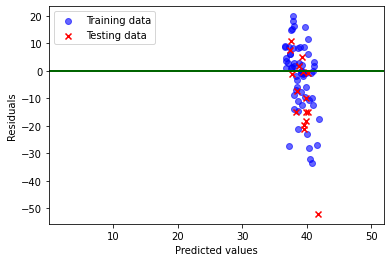

In [37]:
plot_residual(svm_model,
              train_feature.values,
              test_feature.values,
              train_label.values.ravel(),
              test_label.values.ravel())

## 以標準化後資料建立 SVM

In [38]:
sc = StandardScaler()
train_feature_std = sc.fit_transform(train_feature)
test_feature_std = sc.fit_transform(test_feature)
svm_model.fit(train_feature_std, train_label.values.ravel())

SVR()

顯示結果

In [39]:
print(f'train_score: {svm_model.score(train_feature, train_label)}')
print(f'test_score: {svm_model.score(test_feature, test_label)}')

train_score: -0.003604585657671855
test_score: -0.28538999256904485


## 繪製未標準化資料的殘差圖

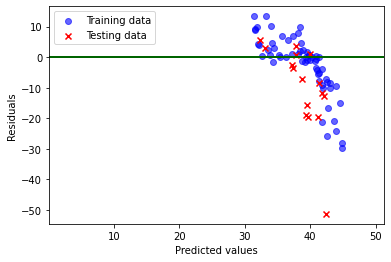

In [40]:
plot_residual(svm_model,
              train_feature_std,
              test_feature_std,
              train_label.values.ravel(),
              test_label.values.ravel())